In [1]:
########### imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.patches import Ellipse
from matplotlib.image import NonUniformImage

import scipy.ndimage as ndimage

from openpmd_viewer import OpenPMDTimeSeries, ParticleTracker

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis')
import Functions_analysis as fcns

In [2]:
run_name = '/PWFA/cpu_test'
data = '20_cores_TUPPL'
directory = '/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/runs'

ts = OpenPMDTimeSeries(directory+run_name+'/'+data + '/diags/hdf5')

In [3]:
##### get all information for witness and driver
do_num_slices = False
tail_charge = .2e-9
tot_charge = .2e-9

beam2 = 'driver'

df_emit2,df_E2,df_twiss2 = fcns.get_everything(beam2, ts, None)

if do_num_slices:
    #pt2_head,pt2_core,pt2_tail = fcns.pt_info(beam2,ts,3)
    pt2_head,pt2_core,pt2_tail_h,pt2_tail_t = fcns.pt_info(beam2,ts,4,None,None,None,None)
    
    df_emit2_H,df_E2_H,df_twiss2_H = fcns.get_everything(beam2,ts,pt2_head)
    df_emit2_C,df_E2_C,df_twiss2_C = fcns.get_everything(beam2,ts,pt2_core)
    #df_emit2_T,df_E2_T,df_twiss2_T = fcns.get_everything(beam2,ts,pt2_tail)
    
    df_emit2_T1,df_E2_T1,df_twiss2_T1 = fcns.get_everything(beam2,ts,pt2_tail_h)
    df_emit2_T2,df_E2_T2,df_twiss2_T2 = fcns.get_everything(beam2,ts,pt2_tail_t)
else:
    x,y,z,px,py,pz,w = ts.get_particle(species = beam2,iteration = 0, var_list =['x','y','z','ux','uy','uz','w'])
    hist, bin_edges = np.histogram(z,bins = 200)
    z_edge = (bin_edges[:-1] + bin_edges[1:])/2
    pt_tail,pt_head = fcns.pt_info(beam2,ts,None,hist,z_edge,tail_charge,tot_charge)
    
    #pt_tail = ParticleTracker(ts, iteration=70, select={'z':[-np.inf,-5e-6], 'x':[-30e-6,30e-6], 'y':[-30e-6,30e-6]}, species=beam2)
    df_emit2_T2,df_E2_T2,df_twiss2_T2 = fcns.get_everything(beam2,ts,pt_tail)
    df_emit2_H,df_E2_H,df_twiss2_H = fcns.get_everything(beam2,ts,pt_head)

/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:45: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(bracket_x_sqrd + bracket_px_sqrd - bracket_x_px**2)


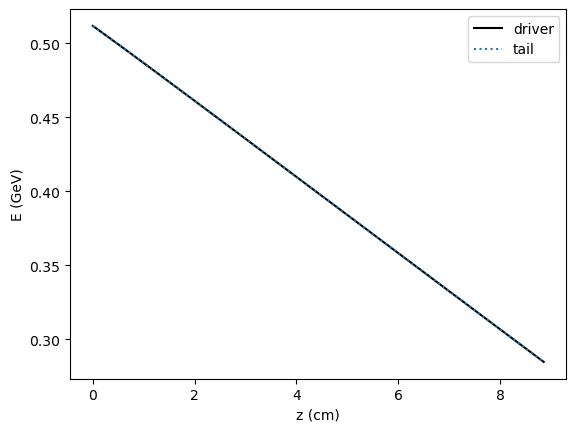

In [4]:
##### plot energy gain & loss
plt.ylabel(r"E (GeV)")
plt.ylabel(r"E (GeV)")
plt.xlabel('z (cm)')

# adjust L units
L_E = df_E2['L'] * 10**2
plt.plot(L_E,df_E2['E'],label = 'driver',c = 'k')

# drive beam
if do_num_slices:
    plt.plot(L_E,df_E2_H['E'],linestyle = 'dashdot',label = 'head')
    plt.plot(L_E,df_E2_C['E'],linestyle = '--',label = 'core')
    plt.plot(L_E,df_E2_T1['E'],linestyle = 'dotted',label = 'tail')
    plt.plot(L_E,df_E2_T2['E'],linestyle = 'dotted',label = 'tail 2')
else:
    plt.plot(L_E,df_E2_T2['E'],linestyle = 'dotted',label = 'tail')
    #plt.plot(L_E,df_E2_H['E'],linestyle = 'dotted',label = 'head')
plt.legend()

#plt.savefig('/Users/Mengshutang/desktop/energy_gain.png',dpi = 300)

In [10]:
L_twiss

0     0.000000
1     0.345083
2     0.690167
3     1.035250
4     1.380333
5     1.723303
6     2.061683
7     2.395887
8     2.725840
9     3.051447
10    3.372680
11    3.689537
12    4.001992
13    4.310018
14    4.613619
15    4.912768
16    5.207428
17    5.497591
18    5.783240
19    6.064369
20    6.340978
21    6.613063
22    6.880610
23    7.143613
24    7.402074
25    7.655977
26    7.905311
27    8.150082
28    8.390280
29    8.625882
30    8.856889
Name: L, dtype: float64

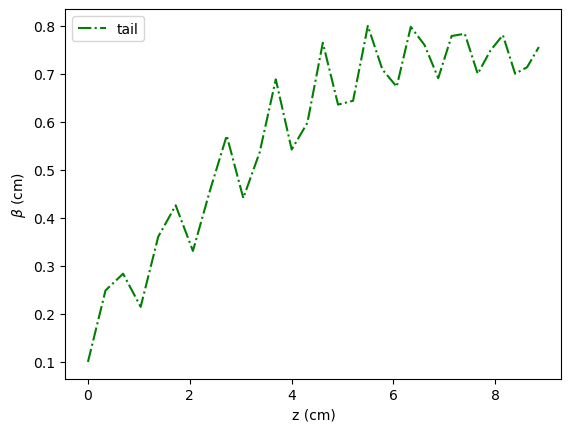

In [5]:
####### beta function evolution in lens

# plot settings
plt.xlabel(r'z (cm)')
plt.ylabel(r'$\beta$ (cm)')

# adjust L range
L_twiss = df_twiss2['L']*10**2

# driver
#plt.plot(L_travel,beta_d*100,c = 'k',label = 'entire bunch')
if do_num_slices:
    plt.plot(L_twiss,df_twiss2_H['beta']*100,c = 'b',linestyle = 'dotted',label = 'head')
    plt.plot(L_twiss,df_twiss2_C['beta']*100,c = 'r',linestyle = '--',label = 'core')
    plt.plot(L_twiss,df_twiss2_T1['beta']*100,c = 'g',linestyle = 'dashdot',label = 'tail')
    plt.plot(L_twiss,df_twiss2_T2['beta']*100,c = 'lime',linestyle = 'dashdot',label = 'tail 2')
else:
    plt.plot(L_twiss,df_twiss2_T2['beta']*100,c = 'green',linestyle = 'dashdot',label = 'tail')
    #plt.plot(L_twiss,df_twiss2_H['beta']*100,c = 'lime',linestyle = 'dashdot',label = 'head')

plt.legend()
#plt.savefig('/Users/Mengshutang/desktop/witness.png',dpi = 300)

z_f = 8.83 ; B_f =0.8
z_vac = -0.0002 ; B_vac = 0.1
sig_x = 18.90845222712011


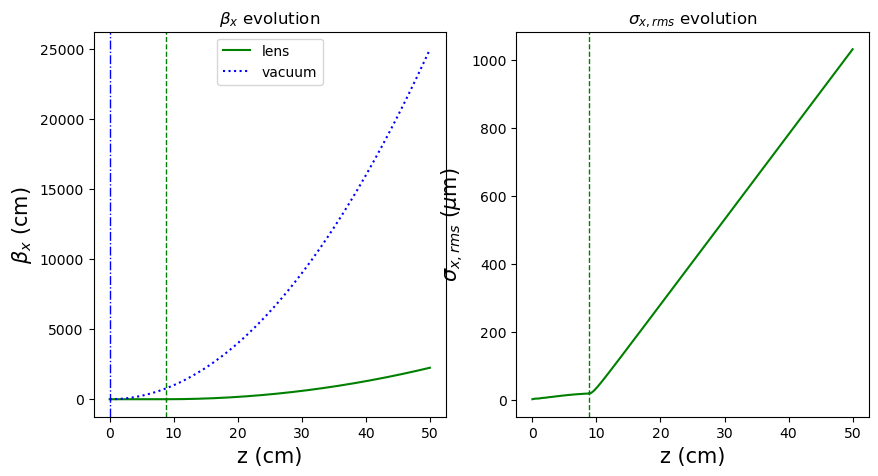

In [6]:
##### Evolution of beam Betafunction and transverse rms size
fig,(ax1,ax2) = plt.subplots(1,2,sharex = True,figsize = (10,5))

### Betafunction evolution
a0 = df_twiss2_T2['alpha'].iloc[-1]
b0 = df_twiss2_T2['beta'].iloc[-1]
g0 = df_twiss2_T2['gamma'].iloc[-1]
L0 = df_twiss2_T2['L'].iloc[-1]
zf = a0/g0 + L0
bf = b0/(1+a0**2)

av = df_twiss2_T2['alpha'].iloc[0]
bv = df_twiss2_T2['beta'].iloc[0]
gv = df_twiss2_T2['gamma'].iloc[0]
zf_v = av/gv
bf_v = bv/(1+av**2)

upp_lens = 50
upp_vac = 50
x = np.linspace(L0*100,upp_lens,10**4) 
xv = np.linspace(0,upp_vac,10**4) 

ax1.plot(L_twiss,df_twiss2_T2['beta']*100,c = 'g',linestyle = '-')
ax1.plot(x,fcns.beta_prop(x,a0,b0,g0,L0*100),linestyle = '-', c = 'g', label = 'lens')
ax1.axvline(x = zf*100,linestyle = '--', c= 'g',linewidth = 1)

ax1.plot(xv,fcns.beta_prop(xv,av,bv,gv,0),linestyle = 'dotted', c = 'b', label = 'vacuum')
ax1.axvline(x = zf_v*100,linestyle = 'dashdot', c= 'b',linewidth = 1)

ax1.set_title(r'$\beta_x$ evolution')
ax1.legend()
ax1.set_xlabel('z (cm)', fontsize = 15)
ax1.set_ylabel(r'$\beta_x$ (cm)',fontsize = 15)

### evolution of beam spot size
x = np.linspace(L0*100,50,10**3)
x_std_lens = np.sqrt(df_emit2_T2['geometric']*1e-6*df_twiss2_T2['beta'])*1e6
x_std_prop = np.sqrt(fcns.beta_prop(x,a0,b0,g0,L0*100)*1e-2 * df_emit2_T2['geometric'].iloc[-1]*1e-6)*1e6
ax2.plot(L_twiss,x_std_lens,c = 'g',linestyle = '-')
ax2.plot(x,x_std_prop,linestyle = '-', c = 'g', label = 'lens')
ax2.axvline(x = zf*100,linestyle = '--', c= 'g',linewidth = 1)

ax2.set_xlabel('z (cm)',fontsize = 15)
ax2.set_ylabel(r'$\sigma_{x,rms}$ ($\mu$m)',fontsize = 15)
ax2.set_title(r'$\sigma_{x,rms}$ evolution')

#df_sig_x = pd.DataFrame()
#df_sig_x['L'] = np.concatenate((L_twiss,x))
#df_sig_x['sig_x'] = np.concatenate((x_std_lens,x_std_prop))
#df_sig_x.to_csv('/Users/Mengshutang/Desktop/CU_PWFA/FACETII_data_analysis/df_sig_300pC.csv',index = None)

print(f'z_f = {np.round(zf,4)*100}',f'; B_f ={np.round(bf,3)*100}')
print(f"z_vac = {np.round(zf_v*100,4)}", f"; B_vac = {np.round(bf_v*100,4)}")
print(f"sig_x = {np.min(x_std_prop)}")

Text(0, 0.5, '$\\epsilon_n$/$\\epsilon_{n,0}$')

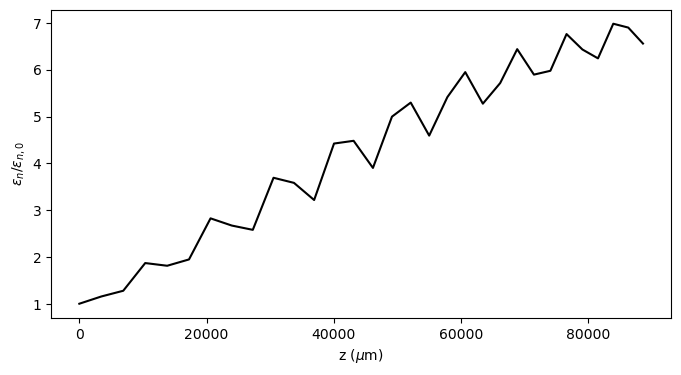

In [7]:
emit_ps_ratio = df_emit2_T2['ps_n']/df_emit2_T2['ps_n'][0]
emit_ts_ratio = df_emit2_T2['ts_n']/df_emit2_T2['ts_n'][0]

tail_emit = df_emit2_T2['geometric'].iloc[-1]

plt.figure(figsize=(8,4))
plt.plot(df_emit2_T2['L']*1e6,emit_ts_ratio,c = 'k',label = 'entire bunch')
plt.xlabel(r'z ($\mu$m)')
plt.ylabel(r'$\epsilon_n$/$\epsilon_{n,0}$')
#plt.savefig('/Users/mengshutang/Desktop/emittance.png',dpi = 300)

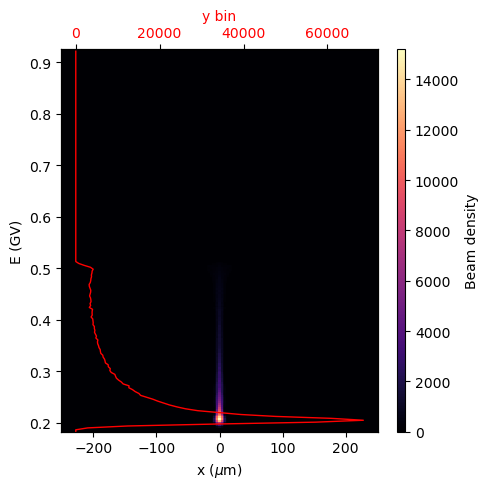

In [8]:
##### x-E plot
plot_vacuum_profile = False
val_truncated = 150

# focused beam
x,y,z,px,py,pz,w = ts.get_particle(species = beam2,iteration = ts.iterations[-1], var_list =['x','y','z','ux','uy','uz','w'])
x_p = px/pz
x_f = x + (zf - L0)*x_p
E_f = fcns.P_to_E(pz)
H, xedges, yedges = np.histogram2d(x_f, E_f, bins=[200,200])
H[H < val_truncated] = 0

# unfocused beam
x_v,px_v,pz_v = ts.get_particle(species = beam2,iteration = ts.iterations[0], var_list =['x','ux','uz'])
x_p_v = px_v/pz_v
x_fv = x_v + zf*x_p_v
E_fv = fcns.P_to_E(pz_v)
H2, xedges2, yedges2 = np.histogram2d(x_fv, E_fv, bins=[200,200])

if plot_vacuum_profile:
    fig,(ax1,ax2) = plt.subplots(1,2,sharex = True, sharey= True,figsize = (7,7))
    #plt.subplots_adjust(wspace=0)
    beam_f = ax1.pcolormesh(xedges*1e6, yedges, H.T, cmap='magma',vmax = 500)
    cb_beam1 = plt.colorbar(beam_f,ax = ax1, location='bottom', aspect=50, pad=0.15,label = 'Beam density')

    beam_v = ax2.pcolormesh(xedges2*1e6, yedges2, H2.T, cmap='magma',vmax = 500)
    cb_beam2 = plt.colorbar(beam_v,ax = ax2, location='bottom', aspect=50, pad=0.15,label = 'Beam density')
else:
    fig,ax1 = plt.subplots(1,1,figsize = (5,5))
    beam_f = ax1.pcolormesh(xedges*1e6, yedges, H.T, cmap='magma')
    cb_beam1 = plt.colorbar(beam_f,ax = ax1, location='right', aspect=50, pad=0.05,label = 'Beam density')

ax_E_dist = ax1.twiny()
ax_E_dist.plot(np.sum(H,axis = 0),yedges[:-1],c = 'r',linestyle = '-',linewidth = 1)

ax_E_dist.tick_params(axis='x', labelcolor = 'r')
ax_E_dist.set_xlabel('y bin', color = 'r')

ax1.set_xlabel(r'x ($\mu$m)')
ax1.set_ylabel(r'E (GV)')
plt.tight_layout()
#plt.savefig('/Users/mengshutang/Desktop/x_E.png',dpi = 300)

$\Beta_{projected}$ = 0.5489737756679518


/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:35: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(x*y)/N - np.sum(x)*np.sum(y)/N**2
/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:69: RuntimeWarning: divide by zero encountered in scalar divide
  alpha = -second_central_moment(x,x_prime)/geometric_emit
/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:70: RuntimeWarning: divide by zero encountered in scalar divide
  beta = second_central_moment(x,x)/geometric_emit
/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:71: RuntimeWarning: divide by zero encountered in scalar divide
  gamma = second_central_moment(x_prime,x_prime)/geometric_emit
/Users/mengshutang/desktop/CU_PWFA/COMPUTATIONS/HiPACE/analysis/Functions_analysis.py:69: RuntimeWarning: invalid value encountered in scalar divide
  alpha = -second_central_mo

Text(0, 0.5, 'f(E) (a.u. normalized)')

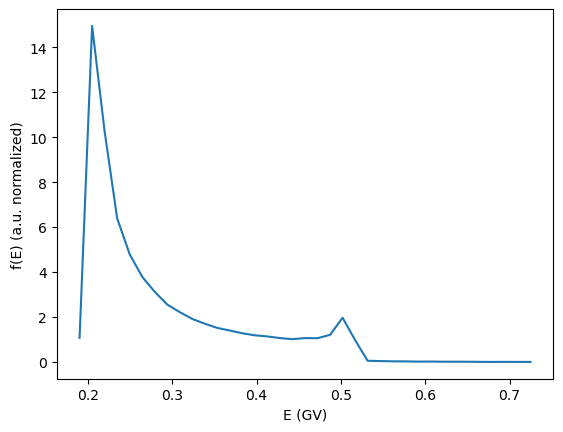

In [9]:
#### projected beta function
x_t,z_t,px_t,pz_t = ts.get_particle(species = beam2,iteration = ts.iterations[-1], var_list =['x','z','ux','uz'],select = pt_tail)

x_p_t = px_t/pz_t
x_f_t = x_t + (zf - L0)*x_p_t
E_t = fcns.P_to_E(pz_t)

### sorted arrays based on ascending energy
arr_idx = E_t.argsort()
z_t = z_t[arr_idx]
E_t = E_t[arr_idx]
x_f_t = x_f_t[arr_idx]
x_p_t = x_p_t[arr_idx]

# E-distribution
hist_E, bin_edges_E = np.histogram(E_t,bins = 50)
E_edge = (bin_edges_E[:-1] + bin_edges_E[1:])/2
E_pdf = hist_E/np.trapz(hist_E,x = E_edge)

def find_nearest_idx(x,a):
    return (np.abs(x - a)).argmin()

Beta_E = np.zeros(len(E_edge))
for i in range(len(bin_edges_E[:-1])):
    j = i + 1
    lo_idx = find_nearest_idx(E_t,bin_edges_E[i])
    if i == len(bin_edges_E[:-1])-1:
        Beta_E[i] = fcns.twiss_params(x_f_t[lo_idx:],x_p_t[lo_idx:])[1]
    else:
        hi_idx = find_nearest_idx(E_t,bin_edges_E[j])
        Beta_E[i] = fcns.twiss_params(x_f_t[lo_idx:hi_idx],x_p_t[lo_idx:hi_idx])[1]

check_stats = hist_E < 30
check_nan = np.isnan(Beta_E)
check_inf = np.isinf(Beta_E)

df_PB = pd.DataFrame()
Beta_E = Beta_E[np.invert(check_nan | check_inf | check_stats)]*100
E_pdf = E_pdf[np.invert(check_nan | check_inf | check_stats)]
E_edge = E_edge[np.invert(check_nan | check_inf | check_stats)]

df_PB['E'] = E_edge
df_PB['E_pdf'] = E_pdf
df_PB['Beta'] = Beta_E

#df_PB = df_PB.loc[df_PB['Beta'] < 200,df_PB.columns]
projected_beta = np.trapz(df_PB['Beta']*df_PB['E_pdf'], x = df_PB['E'])
print(r"$\Beta_{projected}$ = " + f"{projected_beta}")

plt.plot(E_edge,E_pdf)
plt.xlabel('E (GV)')
plt.ylabel('f(E) (a.u. normalized)')